In [1]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np
import json
from pandas.io.json import json_normalize
from functools import reduce

In [2]:
def col_json_to_dict(df, cols):
    "Transform the json values inside a column into list of dictionaries"
    transformed_df = df
    for col in cols:
        transformed_df = transformed_df.assign(**{col: df[col].apply(json.loads)})
    return transformed_df

In [3]:
def col_dict_to_set(df, col, key):
    "Create a set from the values of the dictionaries give a key"
    get_set = lambda dict_list: set([dict_.get(key) for dict_ in dict_list])
    return df.assign(**{col: df[col].apply(get_set)})

In [4]:
def col_filter_dict_with_vals(df, col, field, values):
    "Filter dictionaries with specific values from a column with lists of dictionaries"
    filter_dicts = lambda dict_list: [
        dict_ for dict_ in dict_list if dict_.get(field) in values
    ]
    return df.assign(**{col: df[col].apply(filter_dicts)})

In [5]:
credits_df = pd.read_csv("./data/tmdb_5000_credits.csv", sep=",", quotechar='"')
credits_df.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
movies_df = pd.read_csv("./data/tmdb_5000_movies.csv", sep=",", quotechar='"').rename(
    {"id": "movie_id"}, axis=1
)
movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [7]:
credits_df_cp = credits_df.copy()
movies_df_cp = movies_df.copy()

## Clean movies_df_cp

In [8]:
# movies with empty genre field
len(movies_df_cp[movies_df_cp.astype(str)["genres"] == "[]"])

28

In [9]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)["production_companies"] == "[]"])

351

In [10]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)["production_countries"] == "[]"])

174

In [11]:
# movies with empty production_companies field
len(movies_df_cp[movies_df_cp.astype(str)["spoken_languages"] == "[]"])

86

## Process movies df

In [12]:
pr_movies_df = movies_df_cp
len(pr_movies_df)

4803

In [13]:
pr_movies_df.head()

,budget,genres,homepage,movie_id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [14]:
# Transform json to list of dictionaries within cols
movies_df_json_cols = [
    "genres",
    "production_companies",
    "keywords",
    "production_countries",
    "spoken_languages",
]
cols_to_drop = ["homepage", "overview", "tagline", "original_title"]
key = "name"
movie_id_col = "movie_id"

pr_movies_df = col_json_to_dict(pr_movies_df, movies_df_json_cols)
for col in movies_df_json_cols:
    pr_movies_df = col_dict_to_set(pr_movies_df, col, key)
pr_movies_df = pr_movies_df.drop(columns=cols_to_drop)
pr_movies_df.head()

,budget,genres,movie_id,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"{Science Fiction, Fantasy, Adventure, Action}",19995,"{space travel, love affair, battle, marine, sp...",en,150.437577,"{Twentieth Century Fox Film Corporation, Dune ...","{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800
1,300000000,"{Adventure, Fantasy, Action}",285,"{calypso, traitor, drug abuse, swashbuckler, l...",en,139.082615,"{Second Mate Productions, Walt Disney Pictures...",{United States of America},2007-05-19,961000000,169.0,{English},Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"{Crime, Adventure, Action}",206647,"{british secret service, united kingdom, spy, ...",en,107.376788,"{Columbia Pictures, Danjaq, B24}","{United States of America, United Kingdom}",2015-10-26,880674609,148.0,"{Español, Français, Deutsch, English, Italiano}",Released,Spectre,6.3,4466
3,250000000,"{Crime, Thriller, Action, Drama}",49026,"{superhero, terrorism, flood, tragic hero, sec...",en,112.312950,"{Syncopy, DC Entertainment, Legendary Pictures...",{United States of America},2012-07-16,1084939099,165.0,{English},Released,The Dark Knight Rises,7.6,9106
4,260000000,"{Science Fiction, Adventure, Action}",49529,"{mars, princess, escape, space travel, alien r...",en,43.926995,{Walt Disney Pictures},{United States of America},2012-03-07,284139100,132.0,{English},Released,John Carter,6.1,2124


## Process credits df

In [15]:
pr_credits_df = credits_df_cp
credits_df_json_cols = ["cast", "crew"]
key = "name"
pr_credits_df = col_json_to_dict(pr_credits_df, credits_df_json_cols)
pr_credits_df = pr_credits_df.assign(actors=pr_credits_df[credits_df_json_cols[0]])
for col in credits_df_json_cols:
    if col != "crew":
        pr_credits_df = col_dict_to_set(pr_credits_df, col, key)
crew_col = "crew"
job_field = "job"
values = ["Director"]
# Filter dictionaries with Director as job
pr_credits_df = col_filter_dict_with_vals(
    pr_credits_df, crew_col, job_field, values
).rename({crew_col: values[0]})
pr_credits_df = col_dict_to_set(pr_credits_df, crew_col, key)
# Get actors col
# Only select main actors to reduce the size of the dataset
actors_col = "actors"
order_field = "order"
# Select the number of important actors
values = [0, 1, 2]
pr_credits_df = col_filter_dict_with_vals(
    pr_credits_df, actors_col, order_field, values
).rename({crew_col: values[0]})

get_value = lambda dict_: dict_.get(key)

pr_credits_df = pr_credits_df.explode(actors_col)
pr_credits_df = pr_credits_df[pr_credits_df[actors_col].notna()]
actors_series = pr_credits_df[actors_col]
pr_credits_df = pr_credits_df.assign(
    **{actors_col: pr_credits_df[actors_col].apply(get_value)}
)
# Remove actor from cast
actor_cast_col = "actor_cast"
pr_credits_df = pr_credits_df.reset_index(drop=True)
remove_from_cast = lambda row: row[credits_df_json_cols[0]] - set({row[actors_col]})
pr_credits_df = pr_credits_df.assign(
    **{credits_df_json_cols[0]: pr_credits_df.apply(remove_from_cast, axis=1)}
).drop(columns="title")
pr_credits_df.head()

,movie_id,cast,crew,actors
0,19995,"{Sigourney Weaver, Matt Gerald, Mike Bodnar, A...",{James Cameron},Sam Worthington
1,19995,"{Sigourney Weaver, Matt Gerald, Mike Bodnar, A...",{James Cameron},Zoe Saldana
2,19995,"{Matt Gerald, Mike Bodnar, Anthony Ingruber, H...",{James Cameron},Sigourney Weaver
3,285,"{Takayo Fischer, Stellan Skarsgård, Ghassan Ma...",{Gore Verbinski},Johnny Depp
4,285,"{Takayo Fischer, Stellan Skarsgård, Ghassan Ma...",{Gore Verbinski},Orlando Bloom


In [16]:
actor_cols = ["name", "gender", "order"]
actors_df = json_normalize(actors_series)[actor_cols]
actors_df = (
    actors_df.rename(columns={actor_cols[0]: actors_col})
    .groupby(actors_col)
    .aggregate({actor_cols[1]: max, actor_cols[2]: list})
    .reset_index()
    .reset_index()
    .rename(columns={"index": "actor_id"})
)
actors_df

,actor_id,actors,gender,order
0,0,"""Weird Al"" Yankovic",0,[0]
1,1,50 Cent,2,"[2, 0]"
2,2,A.J. Buckley,2,[1]
3,3,A.J. Cook,1,[1]
4,4,AJ Michalka,1,[0]
...,...,...,...,...
5512,5512,Zuleikha Robinson,1,[1]
5513,5513,Àlex Brendemühl,2,[2]
5514,5514,Óscar Jaenada,2,[1]
5515,5515,Đỗ Thị Hải Yến,1,[2]


In [17]:
actors_credits_df = pr_credits_df.merge(
    actors_df, right_on=actors_col, left_on=actors_col, how="inner"
)
actors_credits_df.head(20)

,movie_id,cast,crew,actors,actor_id,gender,order
0,19995,"{Sigourney Weaver, Matt Gerald, Mike Bodnar, A...",{James Cameron},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]"
1,534,"{Bryce Dallas Howard, David Midthunder, Jane A...",{McG},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]"
2,57165,"{Matt Milne, Liam Neeson, Danny Huston, Lily J...",{Jonathan Liebesman},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]"
3,18823,"{Agyness Deyn, Phil McKee, Jane March, Liam Ne...",{Louis Leterrier},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]"
4,49527,"{Marmee Cosico, Jimmy Palumbo, Ann Arvia, J. B...",{Asger Leth},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]"
5,144336,"{Nick Chacon, Laurence Chavez, Gary Grubbs, Al...",{David Ayer},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]"
6,19995,"{Sigourney Weaver, Matt Gerald, Mike Bodnar, A...",{James Cameron},Zoe Saldana,5505,1,"[1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1]"
7,54138,"{Seth Ayott, Arlen Escarpeta, Ellie Newlands, ...",{J.J. Abrams},Zoe Saldana,5505,1,"[1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1]"
8,118340,"{Michael Rooker, Nick Holmes, Fred, Alex Rose,...",{James Gunn},Zoe Saldana,5505,1,"[1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1]"
9,228326,"{Channing Tatum, Miguel Sandoval, Ishan Sharma...",{Jorge R. Gutierrez},Zoe Saldana,5505,1,"[1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1]"


In [18]:
movie_id_col = "movie_id"
new_movie_id_col = "new_movie_id"
actors_movies_credits_df = actors_credits_df.merge(
    pr_movies_df, right_on=movie_id_col, left_on=movie_id_col, how="inner"
)
# Set new movie ids
unique_movies_df = (
    pr_movies_df[movie_id_col]
    .to_frame()
    .drop_duplicates()
    .reset_index()
    .rename(columns={"index": new_movie_id_col})
)
actors_movies_credits_df = (
    actors_movies_credits_df.merge(
        unique_movies_df, right_on=movie_id_col, left_on=movie_id_col, how="inner"
    )
    .drop(columns=movie_id_col)
    .rename(columns={new_movie_id_col: movie_id_col})
)

actors_movies_credits_df.head()

,cast,crew,actors,actor_id,gender,order,budget,genres,keywords,original_language,...,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,movie_id
0,"{Sigourney Weaver, Matt Gerald, Mike Bodnar, A...",{James Cameron},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]",237000000,"{Science Fiction, Fantasy, Adventure, Action}","{space travel, love affair, battle, marine, sp...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
1,"{Sigourney Weaver, Matt Gerald, Mike Bodnar, A...",{James Cameron},Zoe Saldana,5505,1,"[1, 2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 1]",237000000,"{Science Fiction, Fantasy, Adventure, Action}","{space travel, love affair, battle, marine, sp...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
2,"{Matt Gerald, Mike Bodnar, Anthony Ingruber, H...",{James Cameron},Sigourney Weaver,4837,1,"[2, 0, 0, 1, 0, 0, 0, 0, 1, 2, 2, 0, 0, 2, 0, ...",237000000,"{Science Fiction, Fantasy, Adventure, Action}","{space travel, love affair, battle, marine, sp...",en,...,"{United States of America, United Kingdom}",2009-12-10,2787965087,162.0,"{English, Español}",Released,Avatar,7.2,11800,0
3,"{Bryce Dallas Howard, David Midthunder, Jane A...",{McG},Sam Worthington,4637,2,"[0, 1, 0, 0, 0, 1]",200000000,"{Thriller, Science Fiction, Action}","{killer robot, dystopia, army, gas station, fi...",en,...,"{Italy, Germany, United States of America, Uni...",2009-05-20,371353001,115.0,"{English, Italiano}",Released,Terminator Salvation,5.9,2463,43
4,"{Bryce Dallas Howard, David Midthunder, Sam Wo...",{McG},Christian Bale,911,2,"[0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 0, 0, ...",200000000,"{Thriller, Science Fiction, Action}","{killer robot, dystopia, army, gas station, fi...",en,...,"{Italy, Germany, United States of America, Uni...",2009-05-20,371353001,115.0,"{English, Italiano}",Released,Terminator Salvation,5.9,2463,43


In [19]:
aux_movies_df = unique_movies_df.merge(
    pr_movies_df[["movie_id", "title"]].drop_duplicates(),
    right_on="movie_id",
    left_on="movie_id",
)
aux_movies_df.head()

,new_movie_id,movie_id,title
0,0,19995,Avatar
1,1,285,Pirates of the Caribbean: At World's End
2,2,206647,Spectre
3,3,49026,The Dark Knight Rises
4,4,49529,John Carter


In [20]:
actors_movies_credits_df.columns

Index(['cast', 'crew', 'actors', 'actor_id', 'gender', 'order', 'budget',
       'genres', 'keywords', 'original_language', 'popularity',
       'production_companies', 'production_countries', 'release_date',
       'revenue', 'runtime', 'spoken_languages', 'status', 'title',
       'vote_average', 'vote_count', 'movie_id'],
      dtype='object')

In [21]:
len(actors_movies_credits_df)

13997

In [22]:
get_union = lambda s: reduce(set.union, s)
actor_id_col = "actor_id"
actors_agg_df = (
    actors_movies_credits_df.groupby(actors_col)
    .aggregate(
        {
            "movie_id": set,
            "cast": get_union,
            "crew": get_union,
            "actor_id": max,
            "gender": max,
            "budget": "mean",
            "genres": get_union,
            "keywords": get_union,
            "original_language": set,
            "popularity": "mean",
            "production_companies": get_union,
            "production_countries": get_union,
            "release_date": list,
            "revenue": "mean",
            "runtime": sum,
            "spoken_languages": get_union,
            "status": list,
            "title": set,
            "vote_average": "mean",
            "vote_count": "mean",
        }
    )
    .set_index(actor_id_col)
)
actors_agg_df.head()

,movie_id,cast,crew,gender,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
actor_id,,,,,,,,,,,,,,,,,,,
0,{3619},"{Michael Richards, Victoria Jackson, David Bow...",{Jay Levey},0,5000000.0,{Comedy},"{tv station, satire, game show, music spoof, i...",{en},4.070044,"{Orion Pictures, Cinecorp}",{United States of America},[1989-07-21],0.0,97.0,{English},[Released],{UHF},6.7,89.0
1,"{761, 1233}","{Sterling K. Brown, Terrence Howard, Joy Bryan...","{Jon Avnet, Jim Sheridan}",2,50000000.0,"{Thriller, Action, Crime, Drama}","{dirty cop, revenge, plot twist, career, music...",{en},15.633081,"{Paramount Pictures, InVenture Entertainment, ...",{United States of America},"[2008-09-11, 2005-11-09]",59808547.0,218.0,"{English, Pусский, Español}","[Released, Released]","{Righteous Kill, Get Rich or Die Tryin'}",6.1,280.5
2,{4034},"{Vanessa Evigan, Ron Roggé, Piper Mackenzie Ha...",{John Murlowski},2,0.0,"{Family, Comedy}",{},{en},0.630226,{},{United States of America},[2010-12-01],0.0,89.0,{English},[Released],{Christmas Mail},5.0,15.0
3,{1789},"{Ali Larter, Sarah Carter, Noel Fisher, James ...",{David R. Ellis},1,26000000.0,"{Horror, Mystery}","{ambulance, premonition, hospital}",{en},37.355826,"{New Line Cinema, Zide-Perry Productions}",{United States of America},[2003-01-31],90426405.0,90.0,{English},[Released],{Final Destination 2},5.9,1023.0
4,{4203},"{Michael Welch, Shawnee Smith, Kevin Pollak, E...",{Brad J. Silverman},1,0.0,"{Music, Drama}",{christian},{en},2.160586,"{Coram Deo Studios, Birchwood Pictures}",{United States of America},[2013-10-04],0.0,102.0,{English},[Released],{Grace Unplugged},6.0,24.0


## Build graph

In [23]:
nodes_df = actors_agg_df[["cast", "crew", "production_companies", "genres", "movie_id"]]
nodes_df.head()

,cast,crew,production_companies,genres,movie_id
actor_id,,,,,
0,"{Michael Richards, Victoria Jackson, David Bow...",{Jay Levey},"{Orion Pictures, Cinecorp}",{Comedy},{3619}
1,"{Sterling K. Brown, Terrence Howard, Joy Bryan...","{Jon Avnet, Jim Sheridan}","{Paramount Pictures, InVenture Entertainment, ...","{Thriller, Action, Crime, Drama}","{761, 1233}"
2,"{Vanessa Evigan, Ron Roggé, Piper Mackenzie Ha...",{John Murlowski},{},"{Family, Comedy}",{4034}
3,"{Ali Larter, Sarah Carter, Noel Fisher, James ...",{David R. Ellis},"{New Line Cinema, Zide-Perry Productions}","{Horror, Mystery}",{1789}
4,"{Michael Welch, Shawnee Smith, Kevin Pollak, E...",{Brad J. Silverman},"{Coram Deo Studios, Birchwood Pictures}","{Music, Drama}",{4203}


In [24]:
dict_actor_id = dict(zip(actors_df[actors_col], actors_df[actor_id_col]))
dict_id_actor = dict(zip(actors_df[actor_id_col], actors_df[actors_col]))

## Get cast intersecctions length mat

In [25]:
import timeit


def get_intersections_length_adj_mat(col):
    "Get the intersecction length of the set of each entry with the set of every other entry in the column"
    start = timeit.default_timer()
    adj = np.zeros((col.shape[0], col.shape[0]))
    for (i, set_row) in enumerate(col):
        for (j, set_col) in enumerate(col):
            try:
                adj[i, j] = len(set_row.intersection(set_col))
            except AttributeError:
                adj[i, j] = 0
    stop = timeit.default_timer()
    print("Time: ", stop - start)
    return adj

In [26]:
def get_unions_length_adj_mat(col):
    "Get the unions length of the set of each entry with the set of every other entry in the column"
    start = timeit.default_timer()
    adj = np.zeros((col.shape[0], col.shape[0]))
    for (i, set_row) in enumerate(col):
        for (j, set_col) in enumerate(col):
            try:
                adj[i, j] = len(set_row.union(set_col))
            except AttributeError:
                adj[i, j] = 0
    stop = timeit.default_timer()
    print("Time: ", stop - start)
    return adj

## Get cast intersections

In [27]:
col = "cast"
cast_col = nodes_df[col]
cast_adj_raw = get_intersections_length_adj_mat(cast_col)
cast_adj_diag = np.diag(np.diag(cast_adj_raw))
cast_adj = cast_adj_raw - cast_adj_diag

Time:  38.151904437


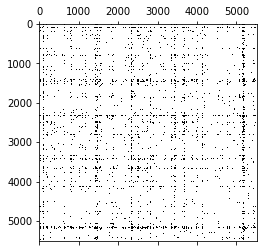

In [28]:
plt.spy(cast_adj)

In [29]:
np.save("cast_adj", cast_adj)

## Load cast adjacency matrix

In [30]:
cast_adj = np.load("cast_adj.npy")

In [31]:
cast_adj.shape

(5517, 5517)

In [32]:
node_degree = cast_adj.sum(axis=0)

In [33]:
most_connected_actors_id = np.argsort(-node_degree)[:20]
most_connected_actors = [dict_id_actor.get(id_) for id_ in most_connected_actors_id]
actors_df[actors_df[actor_id_col].isin(most_connected_actors_id)]
print(most_connected_actors)

['Matt Damon', 'Robert De Niro', 'Bruce Willis', 'Johnny Depp', 'Mark Wahlberg', 'Denzel Washington', 'Owen Wilson', 'Ben Stiller', 'Samuel L. Jackson', 'Ben Affleck', 'Tom Cruise', 'Brad Pitt', 'Nicolas Cage', 'Tom Hanks', 'Leonardo DiCaprio', 'George Clooney', 'Harrison Ford', 'Christian Bale', 'Cameron Diaz', 'Will Ferrell']


## Get cast unions length mat

In [34]:
col = "cast"
cast_col = nodes_df[col]
cast_adj_union_raw = get_unions_length_adj_mat(cast_col)
cast_adj_union_diag = np.diag(np.diag(cast_adj_union_raw))
cast_adj_union = cast_adj_union_raw - cast_adj_union_diag

Time:  146.43614875


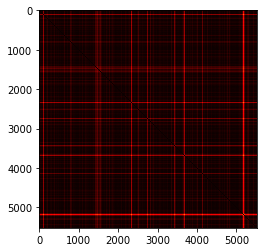

In [35]:
plt.imshow(cast_adj_union, cmap="hot", interpolation="none")

In [36]:
np.save("cast_adj_union", cast_adj_union)

## Get movies intersections length mat

In [37]:
col = "movie_id"
movie_col = nodes_df[col]
movie_adj_raw = get_intersections_length_adj_mat(movie_col)
movie_adj_diag = np.diag(np.diag(movie_adj_raw))
movie_adj = movie_adj_raw - movie_adj_diag

Time:  16.400898885999993


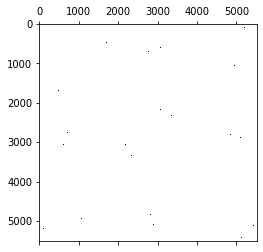

In [38]:
plt.spy(movie_adj)

In [39]:
np.save("movie_adj", movie_adj)

## Get movies union length mat

In [40]:
col = "movie_id"
movie_col = nodes_df[col]
movie_adj_union_raw = get_unions_length_adj_mat(movie_col)
movie_adj_union_diag = np.diag(np.diag(movie_adj_union_raw))
movie_adj_union = movie_adj_union_raw - movie_adj_union_diag

Time:  20.791676578999983


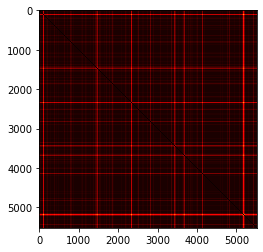

In [41]:
plt.imshow(movie_adj_union, cmap="hot", interpolation="none")

In [42]:
np.save("movie_adj_union", movie_adj_union)

## Get directors intersections lenght mat

In [43]:
col = "crew"
crew_col = nodes_df[col]
crew_adj_raw = get_intersections_length_adj_mat(crew_col)
crew_adj_diag = np.diag(np.diag(crew_adj_raw))
crew_adj = crew_adj_raw - crew_adj_diag

Time:  18.220586407000013


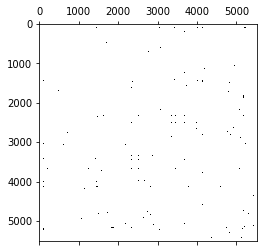

In [44]:
plt.spy(crew_adj)

In [45]:
np.save("crew_adj", crew_adj)

## Get directors union length mat

In [46]:
col = "crew"
crew_col = nodes_df[col]
crew_adj_union_raw = get_unions_length_adj_mat(crew_col)
crew_adj_union_diag = np.diag(np.diag(crew_adj_union_raw))
crew_adj_union = crew_adj_union_raw - crew_adj_union_diag

Time:  21.837577622999987


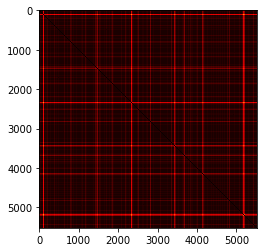

In [47]:
plt.imshow(crew_adj_union, cmap="hot", interpolation="none")

In [48]:
np.save("crew_adj_union", crew_adj_union)

## Get production companies intersections length mat

In [49]:
col = "production_companies"
prod_comp_col = nodes_df[col]
prod_comp_adj_raw = get_intersections_length_adj_mat(prod_comp_col)
prod_comp_adj_diag = np.diag(np.diag(prod_comp_adj_raw))
prod_comp_adj = prod_comp_adj_raw - prod_comp_adj_diag

Time:  18.342983604999972


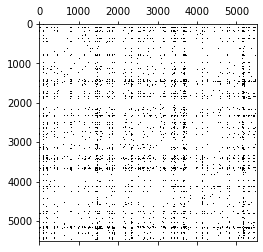

In [50]:
plt.spy(prod_comp_adj)

In [51]:
np.save("prod_comp_adj", prod_comp_adj)

## Get production companies unions length mat

In [52]:
col = "production_companies"
prod_comp_col = nodes_df[col]
prod_comp_adj_union_raw = get_unions_length_adj_mat(prod_comp_col)
prod_comp_adj_union_diag = np.diag(np.diag(prod_comp_adj_union_raw))
prod_comp_adj_union = prod_comp_adj_union_raw - prod_comp_adj_union_diag

Time:  30.561148978000006


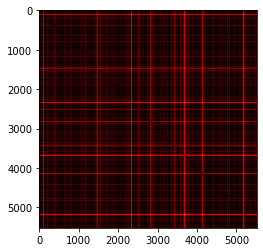

In [53]:
plt.imshow(prod_comp_adj_union, cmap="hot", interpolation="none")

In [54]:
np.save("prod_comp_adj_union", prod_comp_adj_union)

## Get genres intersections length mat

In [55]:
col = "genres"
genres_col = nodes_df[col]
genres_adj_raw = get_intersections_length_adj_mat(genres_col)
genres_adj_diag = np.diag(np.diag(genres_adj_raw))
genres_adj = genres_adj_raw - genres_adj_diag

Time:  19.109947761


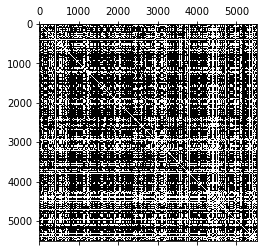

In [56]:
plt.spy(genres_adj)

In [57]:
np.save("genres_adj", genres_adj)

## Get genres unions length mat

In [58]:
col = "genres"
genres_col = nodes_df[col]
genres_adj_union_raw = get_unions_length_adj_mat(genres_col)
genres_adj_union_diag = np.diag(np.diag(genres_adj_union_raw))
genres_adj_union = genres_adj_union_raw - genres_adj_union_diag

Time:  23.09909724099998


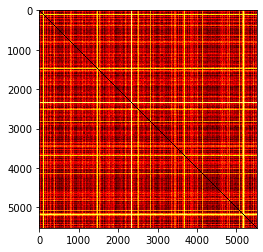

In [59]:
plt.imshow(genres_adj_union, cmap="hot", interpolation="none")

In [60]:
np.save("genres_adj_union", genres_adj_union)

## Aggregated adjacency matrix

In [61]:
agg_adj = np.divide(
    (
        0.3 * cast_adj
        + 0.3 * movie_adj
        + 0.2 * crew_adj
        + 0.1 * genres_adj
        + 0.1 * prod_comp_adj
    ),
    (
        0.3 * cast_adj_union
        + 0.3 * movie_adj_union
        + 0.2 * crew_adj_union
        + 0.1 * genres_adj_union
        + 0.1 * prod_comp_adj_union
    ),
)
agg_adj = np.where(np.isnan(agg_adj), 0, agg_adj)
np.sum(agg_adj)

/Users/arielalba/anaconda3/envs/network-tour/lib/python3.7/site-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  


167980.79168988537

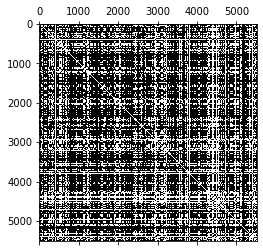

In [62]:
plt.spy(agg_adj)

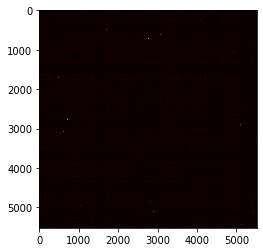

In [63]:
plt.imshow(agg_adj, cmap="hot", interpolation="none")

In [64]:
np.min(agg_adj)

0.0

In [65]:
np.max(agg_adj)

0.9830985915492959

In [66]:
np.save("agg_adj", agg_adj)

In [67]:
np.load("agg_adj.npy")

array([[0.        , 0.        , 0.01612903, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00921659, 0.00977199,
        0.00877193],
       [0.01612903, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.00921659, 0.        , ..., 0.        , 0.01129944,
        0.01020408],
       [0.        , 0.00977199, 0.        , ..., 0.01129944, 0.        ,
        0.0106383 ],
       [0.        , 0.00877193, 0.        , ..., 0.01020408, 0.0106383 ,
        0.        ]])

## Tests

### Test consistency of data

In [68]:
dict_actor_id.get("Sam Worthington")

4637

In [69]:
actors_df[actors_df["actors"] == "Adriana Barraza"]

,actor_id,actors,gender,order
63,63,Adriana Barraza,1,[0]


In [70]:
dict_actor_id.get("Andreas Berg")

In [71]:
actors_df[actors_df["actor_id"] == 1000]

,actor_id,actors,gender,order
1000,1000,Cliff Robertson,0,"[1, 0]"


In [72]:
nodes_df.loc[0, "cast"]

{'Anthony Geary',
 'Billy Barty',
 'David Bowe',
 'Emo Philips',
 'Fran Drescher',
 'Kevin McCarthy',
 'Michael Richards',
 'Trinidad Silva',
 'Victoria Jackson'}

In [73]:
# Test number of actors
len(np.unique(actors_agg_df.index.values))

5517

In [74]:
actors_agg_df

,movie_id,cast,crew,gender,budget,genres,keywords,original_language,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
actor_id,,,,,,,,,,,,,,,,,,,
0,{3619},"{Michael Richards, Victoria Jackson, David Bow...",{Jay Levey},0,5000000.0,{Comedy},"{tv station, satire, game show, music spoof, i...",{en},4.070044,"{Orion Pictures, Cinecorp}",{United States of America},[1989-07-21],0.0,97.0,{English},[Released],{UHF},6.7,89.0
1,"{761, 1233}","{Sterling K. Brown, Terrence Howard, Joy Bryan...","{Jon Avnet, Jim Sheridan}",2,50000000.0,"{Thriller, Action, Crime, Drama}","{dirty cop, revenge, plot twist, career, music...",{en},15.633081,"{Paramount Pictures, InVenture Entertainment, ...",{United States of America},"[2008-09-11, 2005-11-09]",59808547.0,218.0,"{English, Pусский, Español}","[Released, Released]","{Righteous Kill, Get Rich or Die Tryin'}",6.1,280.5
2,{4034},"{Vanessa Evigan, Ron Roggé, Piper Mackenzie Ha...",{John Murlowski},2,0.0,"{Family, Comedy}",{},{en},0.630226,{},{United States of America},[2010-12-01],0.0,89.0,{English},[Released],{Christmas Mail},5.0,15.0
3,{1789},"{Ali Larter, Sarah Carter, Noel Fisher, James ...",{David R. Ellis},1,26000000.0,"{Horror, Mystery}","{ambulance, premonition, hospital}",{en},37.355826,"{New Line Cinema, Zide-Perry Productions}",{United States of America},[2003-01-31],90426405.0,90.0,{English},[Released],{Final Destination 2},5.9,1023.0
4,{4203},"{Michael Welch, Shawnee Smith, Kevin Pollak, E...",{Brad J. Silverman},1,0.0,"{Music, Drama}",{christian},{en},2.160586,"{Coram Deo Studios, Birchwood Pictures}",{United States of America},[2013-10-04],0.0,102.0,{English},[Released],{Grace Unplugged},6.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5512,{498},"{Franky Mwangi, Floyd Red Crow Westerman, Vict...",{Joe Johnston},1,100000000.0,"{Western, Adventure}","{racehorse, horse race, horse}",{en},16.759252,"{Casey Silver Productions, Touchstone Pictures...","{United States of America, Morocco}",[2004-03-05],108103450.0,136.0,{English},[Released],{Hidalgo},6.5,318.0
5513,{2656},"{Mercedes Morán, Andres Gil, Pompeyo Audivert,...",{Daniele Luchetti},2,15000000.0,{Drama},"{pope, biography}",{it},0.738646,{Taodue Film},{Italy},[2015-12-03],0.0,0.0,{Español},[Released],{Chiamatemi Francesco - Il Papa della gente},7.3,12.0
5514,{2742},"{Chelsea Moody, Diego Espejel, Brett Cullen, J...",{Jaume Collet-Serra},2,17000000.0,"{Horror, Thriller, Drama}","{island, mexico, animal attack, young woman, s...",{en},60.829621,"{Columbia Pictures, Weimaraner Republic Pictur...",{United States of America},[2016-06-24],119100758.0,86.0,{English},[Released],{The Shallows},6.2,1567.0


In [75]:
test_movie_id = actors_agg_df.loc[dict_actor_id.get("Sam Worthington")]["movie_id"]
test_movie_id

{0, 43, 132, 206, 1146, 1448}

In [76]:
test_movies_df = unique_movies_df[
    unique_movies_df[new_movie_id_col].isin(test_movie_id)
]
test_movies_df = test_movies_df.merge(
    pr_movies_df, right_on=movie_id_col, left_on=movie_id_col
)
test_movies_df[[movie_id_col, new_movie_id_col, "title"]]

,movie_id,new_movie_id,title
0,19995,0,Avatar
1,534,43,Terminator Salvation
2,57165,132,Wrath of the Titans
3,18823,206,Clash of the Titans
4,49527,1146,Man on a Ledge
5,144336,1448,Sabotage


In [77]:
"Sam Worthington" in pr_credits_df.loc[0, "cast"]

False

In [78]:
pr_credits_df.loc[0]

movie_id                                                19995
cast        {Sigourney Weaver, Matt Gerald, Mike Bodnar, A...
crew                                          {James Cameron}
actors                                        Sam Worthington
Name: 0, dtype: object